In [13]:
import pandas as pd
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
from collections import Counter
import math
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

In [14]:
# Download required NLTK resources
print("Downloading NLTK resources...")
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

True

In [15]:
# Sample text for analysis
sample_text = """
Natural Language Processing (NLP) is a field of artificial intelligence that focuses on the interaction between computers and humans using natural language. The ultimate objective of NLP is to read, decipher, understand, and make sense of human language in a valuable way.

NLP combines computational linguistics—rule-based modeling of human language—with statistical, machine learning, and deep learning models. These technologies enable computers to process human language in the form of text or voice data and to 'understand' its full meaning, complete with the speaker or writer's intent and sentiment.
"""

print("Original text:")
print(sample_text)

Original text:

Natural Language Processing (NLP) is a field of artificial intelligence that focuses on the interaction between computers and humans using natural language. The ultimate objective of NLP is to read, decipher, understand, and make sense of human language in a valuable way.

NLP combines computational linguistics—rule-based modeling of human language—with statistical, machine learning, and deep learning models. These technologies enable computers to process human language in the form of text or voice data and to 'understand' its full meaning, complete with the speaker or writer's intent and sentiment.



In [16]:
# Split text into sentences using regex for simplicity
sentences = re.split(r'(?<=[.!?])\s+', sample_text.strip())
sentences = [s for s in sentences if s.strip()]

In [17]:
print("1. Tokenization:")
print(f"Number of sentences: {len(sentences)}")
print(f"First sentence: {sentences[0]}")

1. Tokenization:
Number of sentences: 4
First sentence: Natural Language Processing (NLP) is a field of artificial intelligence that focuses on the interaction between computers and humans using natural language.


In [18]:
# Split text into words
words = re.findall(r'\b\w+\b|[^\w\s]', sample_text)
print(f"Number of words: {len(words)}")
print(f"First 10 words: {words[:10]}")

Number of words: 110
First 10 words: ['Natural', 'Language', 'Processing', '(', 'NLP', ')', 'is', 'a', 'field', 'of']


In [19]:
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words and word not in string.punctuation]

print("2. Stopword Removal:")
print(f"Words before removal: {len(words)}")
print(f"Words after removal: {len(filtered_words)}")
print(f"First 10 words after removal: {filtered_words[:10]}")

2. Stopword Removal:
Words before removal: 110
Words after removal: 61
First 10 words after removal: ['Natural', 'Language', 'Processing', 'NLP', 'field', 'artificial', 'intelligence', 'focuses', 'interaction', 'computers']


In [20]:
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]

print("3. Stemming:")
print("Sample stemmed words:")
for original, stemmed in zip(filtered_words[:5], stemmed_words[:5]):
    print(f"{original} -> {stemmed}")

3. Stemming:
Sample stemmed words:
Natural -> natur
Language -> languag
Processing -> process
NLP -> nlp
field -> field


In [21]:
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in filtered_words]

print("4. Lemmatization:")
print("Sample lemmatized words:")
for original, lemmatized in zip(filtered_words[:5], lemmatized_words[:5]):
    print(f"{original} -> {lemmatized}")

4. Lemmatization:
Sample lemmatized words:
Natural -> natural
Language -> language
Processing -> processing
NLP -> nlp
field -> field


In [22]:
word_freq = Counter(lemmatized_words)
total_words = len(lemmatized_words)
term_freq = {word: count/total_words for word, count in word_freq.items()}

print("5. Term Frequency (TF):")
print("Top 5 words by frequency:")
for word, freq in sorted(term_freq.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{word}: {freq:.4f}")

5. Term Frequency (TF):
Top 5 words by frequency:
language: 0.0820
human: 0.0656
nlp: 0.0492
natural: 0.0328
computer: 0.0328


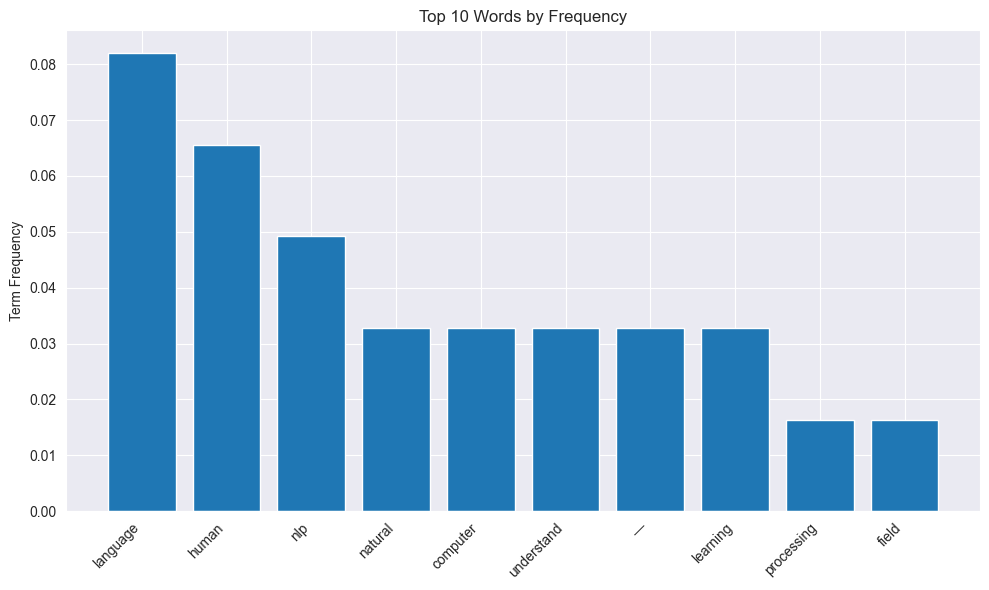

In [23]:
plt.figure(figsize=(10, 6))
top_words = dict(sorted(term_freq.items(), key=lambda x: x[1], reverse=True)[:10])
plt.bar(top_words.keys(), top_words.values())
plt.title('Top 10 Words by Frequency')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Term Frequency')
plt.tight_layout()
plt.show()

In [24]:
comparison = pd.DataFrame({
    'Original': filtered_words[:10],
    'Stemmed': stemmed_words[:10],
    'Lemmatized': lemmatized_words[:10]
})

comparison

,Original,Stemmed,Lemmatized
0,Natural,natur,natural
1,Language,languag,language
2,Processing,process,processing
3,NLP,nlp,nlp
4,field,field,field
5,artificial,artifici,artificial
6,intelligence,intellig,intelligence
7,focuses,focus,focus
8,interaction,interact,interaction
9,computers,comput,computer
